In [6]:
import os
from os import listdir
import pandas as pd
import numpy as np
import glob
import tqdm
from typing import Dict
import matplotlib.pyplot as plt
%matplotlib inline

#plotly
!pip install chart_studio
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

#color
from colorama import Fore, Back, Style

import seaborn as sns
sns.set(style="whitegrid")

#pydicom
import pydicom

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()

In [7]:
%%bash
pwd

/Users/erf/Kaggle/fibrosis


In [92]:
# List files available
list(os.listdir("/Users/erf/Kaggle/fibrosis/osic-pulmonary-fibrosis-progression"))

['.DS_Store',
 'test',
 'test.csv',
 'train',
 'train.csv',
 'sample_submission.csv']

In [10]:
IMAGE_PATH = "/Users/erf/Kaggle/fibrosis/osic-pulmonary-fibrosis-progressiont/"

train_df = pd.read_csv('/Users/erf/Kaggle/fibrosis/osic-pulmonary-fibrosis-progression/train.csv')
test_df = pd.read_csv('/Users/erf/Kaggle/fibrosis/osic-pulmonary-fibrosis-progression/test.csv')

print(Fore.YELLOW + 'Training data shape: ',Style.RESET_ALL,train_df.shape)
train_df.head(5)

Training data shape:   (1549, 7)


,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [89]:
train_df.FVC.mean(),train_df.FVC.std()

(2690.479018721756, 832.7709592986733)

In [12]:
train_df.groupby(['SmokingStatus']).count()['Sex'].to_frame()

,Sex
SmokingStatus,
Currently smokes,82
Ex-smoker,1038
Never smoked,429


In [20]:
train_df["SmokingStatus"].values

array(['Ex-smoker', 'Ex-smoker', 'Ex-smoker', ..., 'Never smoked',
       'Never smoked', 'Never smoked'], dtype=object)

In [23]:
train_df.groupby(['SmokingStatus']).count()

,Patient,Weeks,FVC,Percent,Age,Sex
SmokingStatus,,,,,,
Currently smokes,82,82,82,82,82,82
Ex-smoker,1038,1038,1038,1038,1038,1038
Never smoked,429,429,429,429,429,429


In [24]:
train_df.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [25]:
train_df.shape

(1549, 7)

In [26]:
train_df.groupby(['Sex']).count()

,Patient,Weeks,FVC,Percent,Age,SmokingStatus
Sex,,,,,,
Female,325,325,325,325,325,325
Male,1224,1224,1224,1224,1224,1224


In [27]:
train_df.isna

<bound method DataFrame.isna of                         Patient  Weeks   FVC    Percent  Age   Sex  \
0     ID00007637202177411956430     -4  2315  58.253649   79  Male   
1     ID00007637202177411956430      5  2214  55.712129   79  Male   
2     ID00007637202177411956430      7  2061  51.862104   79  Male   
3     ID00007637202177411956430      9  2144  53.950679   79  Male   
4     ID00007637202177411956430     11  2069  52.063412   79  Male   
...                         ...    ...   ...        ...  ...   ...   
1544  ID00426637202313170790466     13  2712  66.594637   73  Male   
1545  ID00426637202313170790466     19  2978  73.126412   73  Male   
1546  ID00426637202313170790466     31  2908  71.407524   73  Male   
1547  ID00426637202313170790466     43  2975  73.052745   73  Male   
1548  ID00426637202313170790466     59  2774  68.117081   73  Male   

     SmokingStatus  
0        Ex-smoker  
1        Ex-smoker  
2        Ex-smoker  
3        Ex-smoker  
4        Ex-smoker  
.

In [28]:
# Null values and Data types
print(Fore.YELLOW + 'Train Set !!',Style.RESET_ALL)
print(train_df.info())
print('-------------')
print(Fore.BLUE + 'Test Set !!',Style.RESET_ALL)
print(test_df.info())

Train Set !! 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB
None
-------------
Test Set !! 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        5 non-null      object 
 1   Weeks          5 non-null      int64  
 2   FVC            5 non-null      int64  
 3   Percent        5 non-null      float64
 4   Age            5 non

In [30]:
train_df.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

In [31]:
test_df.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

In [32]:
# Total number of Patient in the dataset(train+test)

print(Fore.YELLOW +"Total Patients in Train set: ",Style.RESET_ALL,train_df['Patient'].count())
print(Fore.BLUE +"Total Patients in Test set: ",Style.RESET_ALL,test_df['Patient'].count())

Total Patients in Train set:   1549
Total Patients in Test set:   5


In [33]:
print(Fore.YELLOW + "The total patient ids are",Style.RESET_ALL,f"{train_df['Patient'].count()},", Fore.BLUE + "from those the unique ids are", Style.RESET_ALL, f"{train_df['Patient'].value_counts().shape[0]}.")

The total patient ids are  1549, from those the unique ids are  176.


In [34]:
train_patient_ids = set(train_df['Patient'].unique())
test_patient_ids = set(test_df['Patient'].unique())

train_patient_ids.intersection(test_patient_ids)

{'ID00419637202311204720264',
 'ID00421637202311550012437',
 'ID00422637202311677017371',
 'ID00423637202312137826377',
 'ID00426637202313170790466'}

In [35]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus']


In [36]:
train_df['Patient'].value_counts().max()

10

In [37]:
test_df['Patient'].value_counts().max()

1

In [38]:
np.quantile(train_df['Patient'].value_counts(), 0.75) - np.quantile(test_df['Patient'].value_counts(), 0.25)

8.0

In [39]:
print(np.quantile(train_df['Patient'].value_counts(), 0.95))
print(np.quantile(test_df['Patient'].value_counts(), 0.95))

10.0
1.0


In [43]:
files = folders = 0

path = "/Users/erf/Kaggle/fibrosis/osic-pulmonary-fibrosis-progressiont/train"

for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)
print(Fore.YELLOW +"Total Patients in Train set: ",Style.RESET_ALL,train_df['Patient'].count())
print(Fore.YELLOW +f'{files:,}',Style.RESET_ALL,"files/images, " + Fore.BLUE + f'{folders:,}',Style.RESET_ALL ,'folders/patients')

Total Patients in Train set:   1549
0  files/images, 0  folders/patients


In [44]:
files = []
for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    files.append(len(filenames))

print(Fore.YELLOW +f'{round(np.mean(files)):,}',Style.RESET_ALL,'average files/images per patient')
print(Fore.BLUE +f'{round(np.max(files)):,}',Style.RESET_ALL, 'max files/images per patient')

ValueError: cannot convert float NaN to integer

In [45]:
patient_df = train_df[['Patient', 'Age', 'Sex', 'SmokingStatus']].drop_duplicates()
patient_df.head()

,Patient,Age,Sex,SmokingStatus
0,ID00007637202177411956430,79,Male,Ex-smoker
9,ID00009637202177434476278,69,Male,Ex-smoker
18,ID00010637202177584971671,60,Male,Ex-smoker
27,ID00011637202177653955184,72,Male,Ex-smoker
36,ID00012637202177665765362,65,Male,Never smoked


In [47]:
# Creating unique patient lists and their properties. 
train_dir = '/Users/erf/Kaggle/fibrosis/osic-pulmonary-fibrosis-progressiont/train'
test_dir = '/Users/erf/Kaggle/fibrosis/osic-pulmonary-fibrosis-progressiont/test'

patient_ids = os.listdir(train_dir)
patient_ids = sorted(patient_ids)

#Creating new rows
no_of_instances = []
age = []
sex = []
smoking_status = []

for patient_id in patient_ids:
    patient_info = train_df[train_df['Patient'] == patient_id].reset_index()
    no_of_instances.append(len(os.listdir(train_dir + patient_id)))
    age.append(patient_info['Age'][0])
    sex.append(patient_info['Sex'][0])
    smoking_status.append(patient_info['SmokingStatus'][0])

#Creating the dataframe for the patient info    
patient_df = pd.DataFrame(list(zip(patient_ids, no_of_instances, age, sex, smoking_status)), 
                                 columns =['Patient', 'no_of_instances', 'Age', 'Sex', 'SmokingStatus'])
print(patient_df.info())
patient_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/erf/Kaggle/fibrosis/osic-pulmonary-fibrosis-progressiont/train'

In [48]:
patient_df['SmokingStatus'].value_counts()

Ex-smoker           118
Never smoked         49
Currently smokes      9
Name: SmokingStatus, dtype: int64

In [49]:
patient_df['SmokingStatus'].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='blue',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the SmokingStatus column in the Unique Patient Set')

In [50]:
train_df['Weeks'].value_counts().head()

8     45
12    44
18    42
10    41
6     40
Name: Weeks, dtype: int64

In [51]:
train_df['Weeks'].value_counts().iplot(kind='barh',
                                      xTitle='Counts(Weeks)', 
                                      linecolor='black', 
                                      opacity=0.7,
                                      color='#FB8072',
                                      theme='pearl',
                                      bargap=0.2,
                                      gridcolor='white',
                                      title='Distribution of the Weeks in the training set')

In [53]:
train_df['Weeks'].iplot(kind='hist',
                              xTitle='Weeks', 
                              yTitle='Counts',
                              linecolor='black', 
                              opacity=0.7,
                              color='#FB8072',
                              theme='pearl',
                              bargap=0.2,
                              gridcolor='white',
                              title='Distribution of the Weeks in the training set')

In [54]:
fig = px.scatter(train_df, x="Weeks", y="Age", color='Sex')
fig.show()

In [55]:
train_df['FVC'].value_counts()

2095    4
2889    4
2474    4
2965    4
2694    4
       ..
3313    1
3661    1
3299    1
5895    1
4096    1
Name: FVC, Length: 1202, dtype: int64

In [56]:
train_df['FVC'].iplot(kind='hist',
                      xTitle='Lung Capacity(ml)', 
                      linecolor='black', 
                      opacity=0.8,
                      color='#FB8072',
                      bargap=0.5,
                      gridcolor='white',
                      title='Distribution of the FVC in the training set')

In [57]:
fig = px.scatter(train_df, x="FVC", y="Percent", color='Age')
fig.show()

In [58]:
fig = px.scatter(train_df, x="FVC", y="Age", color='Sex')
fig.show()

In [59]:
fig = px.scatter(train_df, x="FVC", y="Weeks", color='SmokingStatus')
fig.show()

In [60]:
#Pick one patient for FVC vs Weeks
patient = train_df[train_df.Patient == 'ID00228637202259965313869']
fig = px.line(patient, x="Weeks", y="FVC", color='SmokingStatus')
fig.show()

In [61]:
train_df['Percent'].value_counts()

83.282505     2
86.559510     2
121.595445    2
80.474296     2
61.885639     2
             ..
82.589902     1
65.508606     1
52.391737     1
54.591498     1
52.749977     1
Name: Percent, Length: 1536, dtype: int64

In [62]:
train_df['Percent'].iplot(kind='hist',bins=30,color='blue',xTitle='Percent distribution',yTitle='Count')

In [63]:
df = train_df
fig = px.violin(df, y='Percent', x='SmokingStatus', box=True, color='Sex', points="all",
          hover_data=train_df.columns)
fig.show()

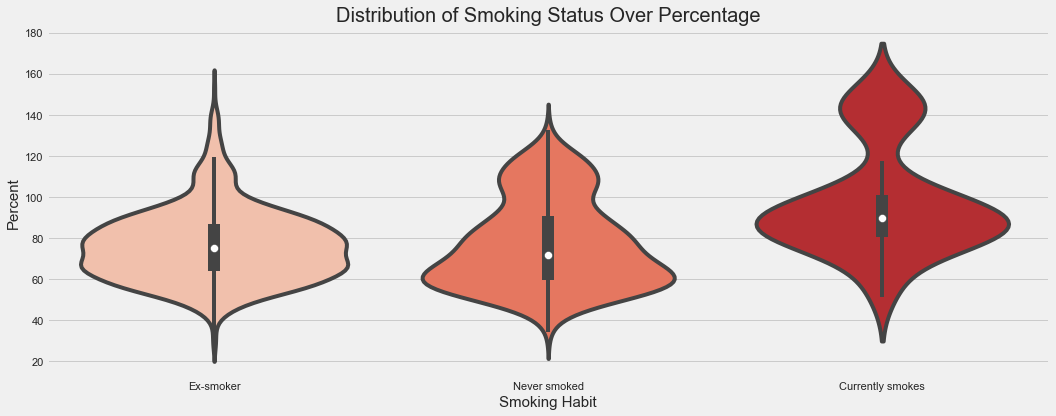

In [64]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x = train_df['SmokingStatus'], y = train_df['Percent'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Smoking Habit', fontsize = 15)
ax.set_ylabel(ylabel = 'Percent', fontsize = 15)
ax.set_title(label = 'Distribution of Smoking Status Over Percentage', fontsize = 20)
plt.show()

In [65]:
fig = px.scatter(train_df, x="Age", y="Percent", color='SmokingStatus')
fig.show()

In [66]:
patient = train_df[train_df.Patient == 'ID00228637202259965313869']
fig = px.line(patient, x="Weeks", y="Percent", color='SmokingStatus')
fig.show()

In [67]:
patient_df['Age'].iplot(kind='hist',bins=30,color='red',xTitle='Ages of distribution',yTitle='Count')

In [68]:
patient_df['SmokingStatus'].value_counts()

Ex-smoker           118
Never smoked         49
Currently smokes      9
Name: SmokingStatus, dtype: int64

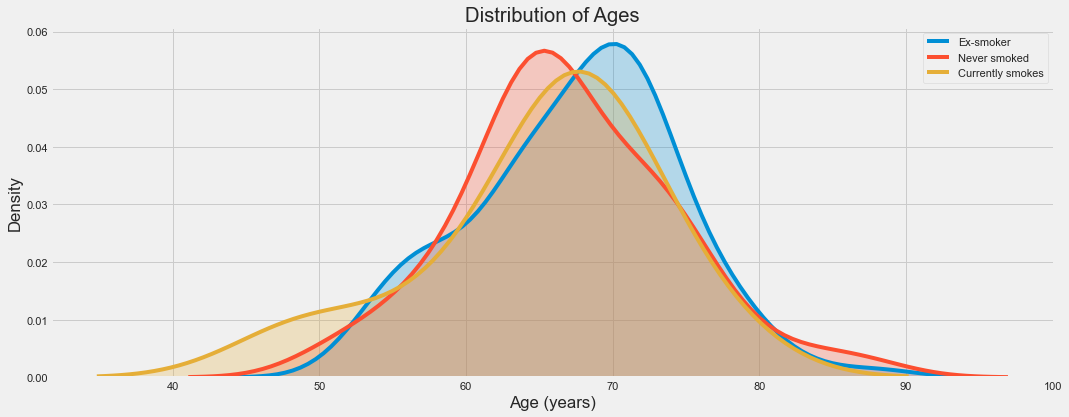

In [69]:
plt.figure(figsize=(16, 6))
sns.kdeplot(patient_df.loc[patient_df['SmokingStatus'] == 'Ex-smoker', 'Age'], label = 'Ex-smoker',shade=True)
sns.kdeplot(patient_df.loc[patient_df['SmokingStatus'] == 'Never smoked', 'Age'], label = 'Never smoked',shade=True)
sns.kdeplot(patient_df.loc[patient_df['SmokingStatus'] == 'Currently smokes', 'Age'], label = 'Currently smokes', shade=True)

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

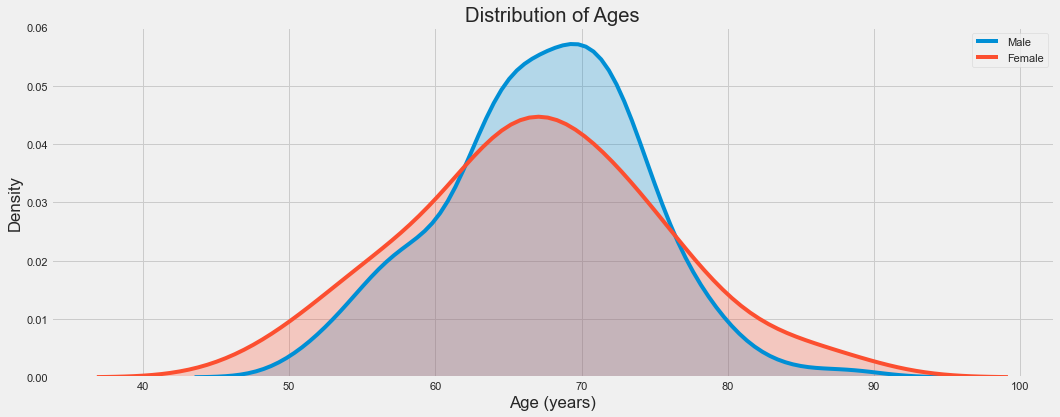

In [70]:
plt.figure(figsize=(16, 6))
sns.kdeplot(patient_df.loc[patient_df['Sex'] == 'Male', 'Age'], label = 'Male',shade=True)
sns.kdeplot(patient_df.loc[patient_df['Sex'] == 'Female', 'Age'], label = 'Female',shade=True)
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [71]:
def plot_pixel_array(dataset, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.grid(False)
    plt.imshow(dataset.pixel_array, cmap='gray') # cmap=plt.cm.bone)
    plt.show()

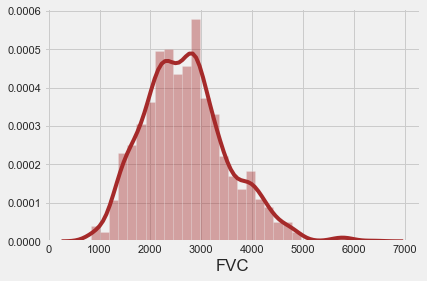

In [73]:
import seaborn as sns
sns.distplot(train_df.FVC, color = "brown");

In [74]:
train_df.FVC.mean()

2690.479018721756

In [75]:
train_df.FVC.std()

832.7709592986733

In [77]:
## evaluation metric function
def laplace_log_likelihood(actual_fvc, predicted_fvc, confidence, return_values = False):
    """
    Calculates the modified Laplace Log Likelihood score for this competition.
    """
    sd_clipped = np.maximum(confidence, 70)
    delta = np.minimum(np.abs(actual_fvc - predicted_fvc), 1000)
    metric = - np.sqrt(2) * delta / sd_clipped - np.log(np.sqrt(2) * sd_clipped)

    if return_values:
        return metric
    else:
        return np.mean(metric)


## default benchmark
laplace_log_likelihood(train_df.FVC, np.mean(train_df.FVC), np.std(train_df.FVC))

-8.023182671302116

In [85]:
from bokeh.models import ColumnDataSource, CustomJS, Label, Range1d, Slider, Span
from bokeh.plotting import figure, output_notebook, show
from bokeh.layouts import row, column

In [86]:
def plot_metric_constants(actual_fvc, constant_fvc, constant_confidence):
    """
    Generatings a bokeh plot for a constant value of predicted FVC and confidence.
    """
    lll = laplace_log_likelihood(actual_fvc, constant_fvc, constant_confidence)

    df = pd.DataFrame({
        "actual_FVC": actual_fvc,
        "predicted_FVC": constant_fvc,
        "confidence": constant_confidence,
        "metric": laplace_log_likelihood(actual_fvc, constant_fvc, constant_confidence, return_values = True)
    }).sort_values("actual_FVC")
    
    source = ColumnDataSource(df)
    
    tooltips = [
        ("Actual FVC", "@actual_FVC{0}"),
        ("Predicted FVC", "@predicted_FVC{0}"),
        ("Confidence", "@confidence{0}"),
        ("Metric", "@metric{0.000}")
    ]
    
    v = figure(
        plot_width = 345,
        plot_height = 345,
        y_range = Range1d(-4, -25),
        tooltips = tooltips,
        title = f"Metric values for FVC = {constant_fvc}, Confidence = {constant_confidence}"
    )

    v.circle("actual_FVC", "metric", source = source, size = 3, color = "deepskyblue", alpha = 0.8)
    
    mean = Span(
        location = lll,
        dimension = "width",
        line_color = "red",
        line_dash = "dashed",
        line_width = 1.5
    )

    v.add_layout(mean)
    
    score = Label(
        x = 3500,
        y = lll + 1.25,
        text = f"Laplace Log Likelihood = {round(lll, 3)}",
        text_font_size = "7pt"
    )

    v.add_layout(score)
    
    v.xaxis.axis_label = "Actual FVC"
    v.yaxis.axis_label = "Metric Value"

    return v


v1 = plot_metric_constants(train_df.FVC, 2690, 100)
v2 = plot_metric_constants(train_df.FVC, 2000, 100)
v3 = plot_metric_constants(train_df.FVC, 3000, 100)
v4 = plot_metric_constants(train_df.FVC, 4000, 100)

v5 = plot_metric_constants(train_df.FVC, 2000, 833)
v6 = plot_metric_constants(train_df.FVC, 2690, 833)
v7 = plot_metric_constants(train_df.FVC, 3000, 833)
v8 = plot_metric_constants(train_df.FVC, 4000, 833)

v9 = plot_metric_constants(train_df.FVC, 2690, 70)
v10 = plot_metric_constants(train_df.FVC, 2690, 100)
v11 = plot_metric_constants(train_df.FVC, 2690, 833)
v12 = plot_metric_constants(train_df.FVC, 2690, 1000)

show(column(row(v1, v2), row(v3, v4), row(v5, v6), row(v7, v8), row(v9, v10), row(v11, v12)))

In [87]:
source = ColumnDataSource(data = dict(
    x = range(70, 2001),
    y = [- np.sqrt(2) * 500 / x - np.log(np.sqrt(2) * x) for x in range(70, 2001)]
))

tooltips = [
    ("Confidence", "@x"),
    ("Metric", "@y")
]

v1 = figure(
    plot_width = 300,
    plot_height = 300,
    tooltips = tooltips,
    title = "Metric values across confidence"
)

v1.line("x", "y", source = source, width = 4, color = "coral", alpha = 0.8)

v1.y_range.flipped = True

v1.xaxis.axis_label = "Confidence (Uncertainty)"
v1.yaxis.axis_label = "Metric Value"

v2 = figure(
    plot_width = 300,
    plot_height = 300,
    tooltips = tooltips,
    y_range = Range1d(-4, -25),
    title = "Metric values across confidence"
)

v2.line("x", "y", source = source, width = 4, color = "coral", alpha = 0.8)

v2.xaxis.axis_label = "Confidence (Uncertainty)"
v2.yaxis.axis_label = "Metric Value"


slider_actual_FVC = Slider(start = 827, end = 6399, value = 2500, step = 1, title = "Actual FVC")
slider_predicted_FVC = Slider(start = 827, end = 6399, value = 3000, step = 1, title = "Predicted FVC")

callback = CustomJS(args = dict(
    source = source,
    actual_FVC = slider_actual_FVC,
    predicted_FVC = slider_predicted_FVC
), code = """
    var data = source.data
    var actual_FVC = actual_FVC.value
    var predicted_FVC = predicted_FVC.value

    var x = data['x']
    var y = data['y']
    var delta = Math.min(Math.abs(actual_FVC - predicted_FVC), 1000)

    for (var i = 0; i < x.length; i++) {
        y[i] = - Math.sqrt(2) * delta / x[i] - Math.log(Math.sqrt(2) * x[i])
    }

    source.change.emit();
""")

slider_actual_FVC.js_on_change("value", callback)
slider_predicted_FVC.js_on_change("value", callback)

show(column(slider_actual_FVC, slider_predicted_FVC, row(v1, v2)))